In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('../../12_data/moviereviews.tsv', sep='\t')


In [16]:
quora = pd.read_csv('../../12_data/quora_questions.csv')

In [17]:
quora.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [8]:
quora.Question[0]

'What is the step by step guide to invest in share market in india?'

In [9]:
#pre processing

In [10]:
#Import the TfidfVectorizer class from scikit-learn= converts text doc into a matrix TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
'''
max_df=0.95 =  Ignore terms that appear in more than 95% of documents (too common, likely uninformative).
min_df=2 = Ignore terms that appear in fewer than 2 documents (too rare)
stop_words='english' = Remove common English stop words like "the", "is", "and", etc.

'''
tfidf = TfidfVectorizer(max_df = 0.95, min_df=2, stop_words='english')

In [12]:
'''
Learn the vocabulary and IDF from the "Question" column of the quora DataFrame.
Transform the questions into a Document-Term Matrix (DTM) where each row is a document, each column is a term, and the values are TF-IDF scores
'''

dtm = tfidf.fit_transform(quora['Question']) 

In [13]:
#outputs the sparse matrix representing the TF-IDF weighted document-term matrix.
dtm  

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2002912 stored elements and shape (404289, 38669)>

In [15]:
#Non-negative Matrix Factorization

In [16]:
from sklearn.decomposition import NMF

In [17]:
# Create an NMF model to extract 20 topics from the document-term matrix
nmf_model = NMF(n_components=20, random_state=42)

In [19]:
# Fit the NMF model on the document-term matrix (dtm)
nmf_model.fit(dtm)

./12_data/.pyenv/versions/3.11.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=20, random_state=42)

In [20]:
for index, topic in enumerate(nmf_model.components_):
    print(f"The top 15 words for topic #{index}")

#Get the indices of the top 15 words with highest weights in this topic,
# then retrieve their corresponding feature names (words) from the TF-IDF vectorizer
    print ([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

The top 15 words for topic #0
['thing', 'read', 'place', 'visit', 'places', 'phone', 'buy', 'laptop', 'movie', 'ways', '2016', 'books', 'book', 'movies', 'best']


The top 15 words for topic #1
['majors', 'recruit', 'sex', 'looking', 'differ', 'use', 'exist', 'really', 'compare', 'cost', 'long', 'feel', 'work', 'mean', 'does']


The top 15 words for topic #2
['add', 'answered', 'needing', 'post', 'easily', 'improvement', 'delete', 'asked', 'google', 'answers', 'answer', 'ask', 'question', 'questions', 'quora']


The top 15 words for topic #3
['using', 'website', 'investment', 'friends', 'black', 'internet', 'free', 'home', 'easy', 'youtube', 'ways', 'earn', 'online', 'make', 'money']


The top 15 words for topic #4
['balance', 'earth', 'day', 'death', 'changed', 'live', 'want', 'change', 'moment', 'real', 'important', 'thing', 'meaning', 'purpose', 'life']


The top 15 words for topic #5
['reservation', 'engineering', 'minister', 'president', 'company', 'china', 'business', 'country', 

In [21]:
#applies the trained NMF model to the document-term matrix (dtm)
topic_results = nmf_model.transform(dtm)

In [22]:
#argmax(axis=1) returns the topic index that has the largest value for each document.
quora['Topic'] = topic_results.argmax(axis=1)

In [25]:
quora.head()

,Question,Topic
0,What is the step by step guide to invest in sh...,5
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,16
2,How can I increase the speed of my internet co...,17
3,Why am I mentally very lonely? How can I solve...,11
4,"Which one dissolve in water quikly sugar, salt...",14


In [27]:
#Visualization and analysis of the top words in each topic

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

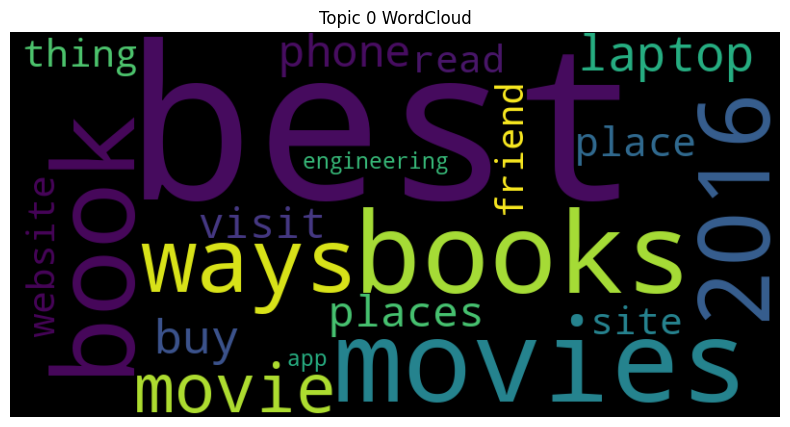

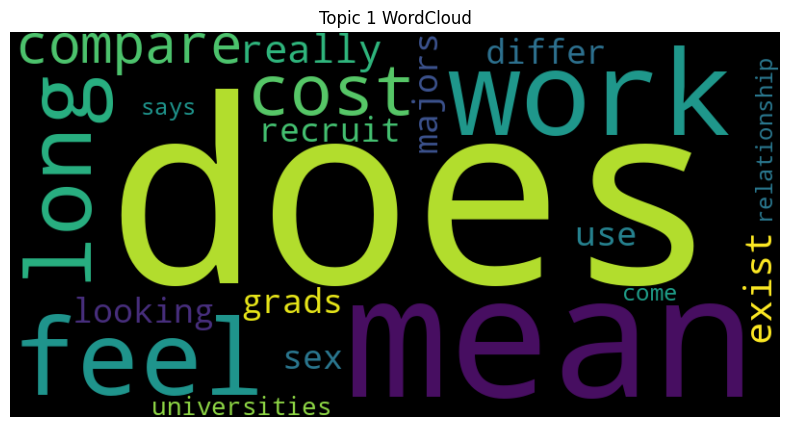

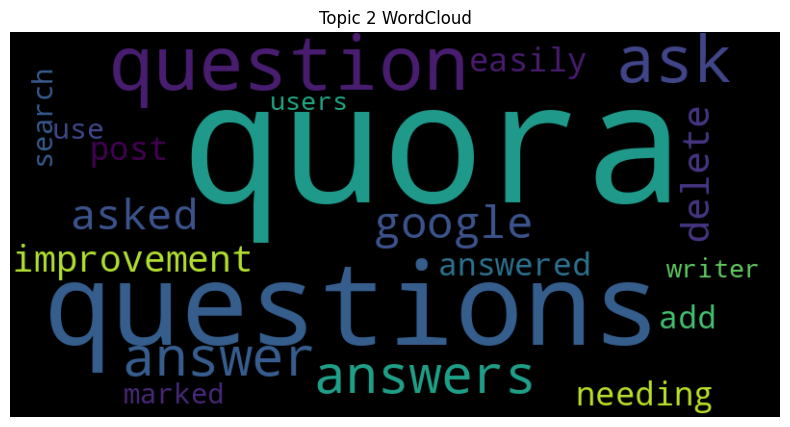

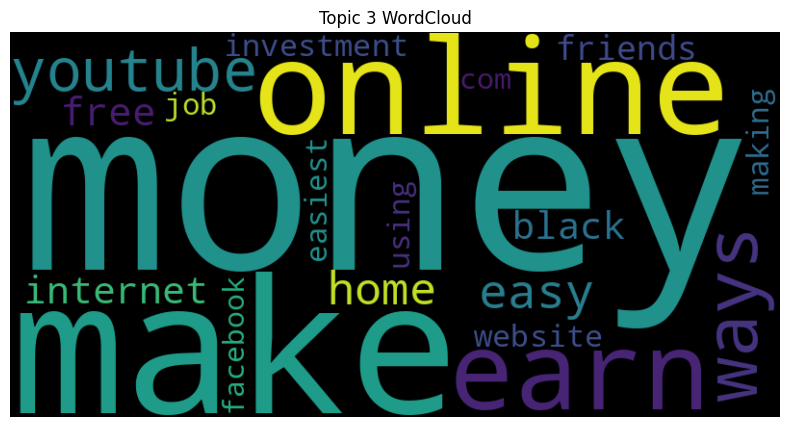

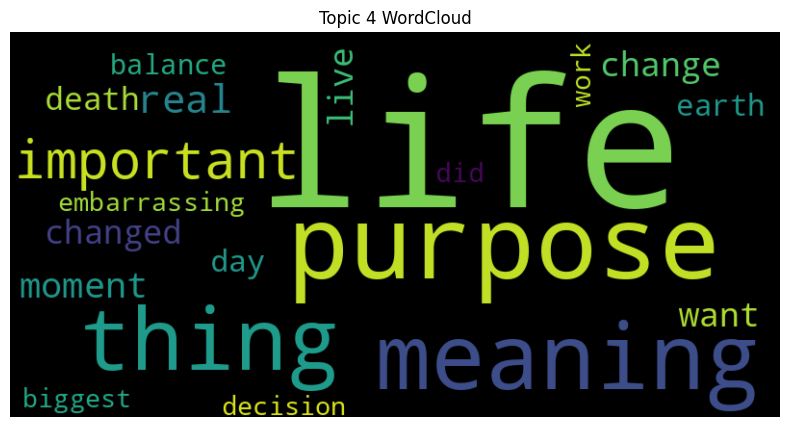

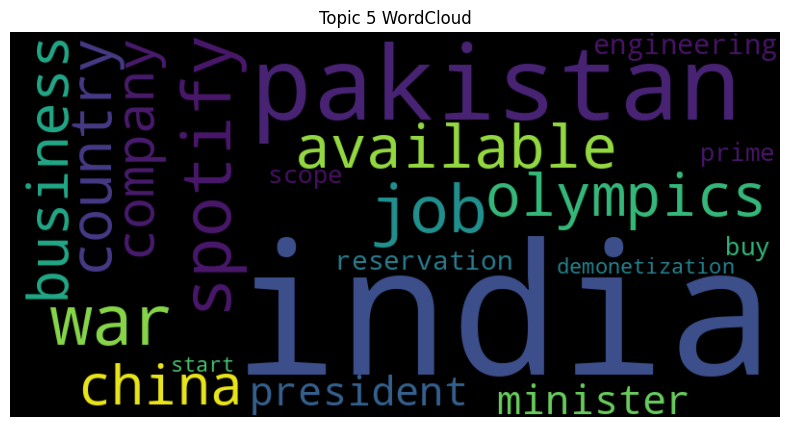

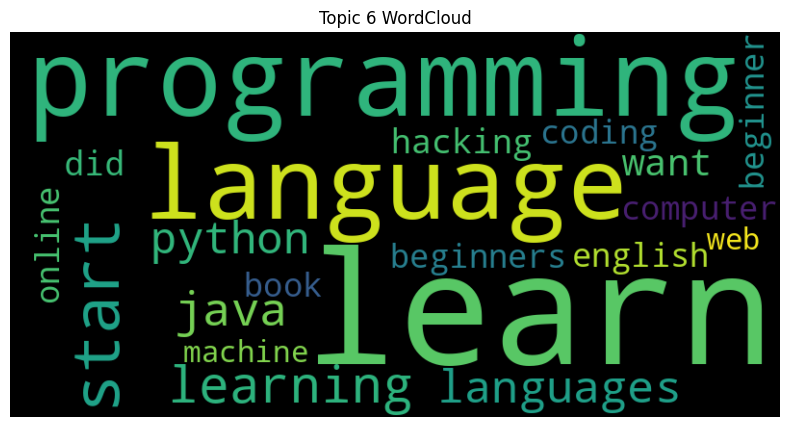

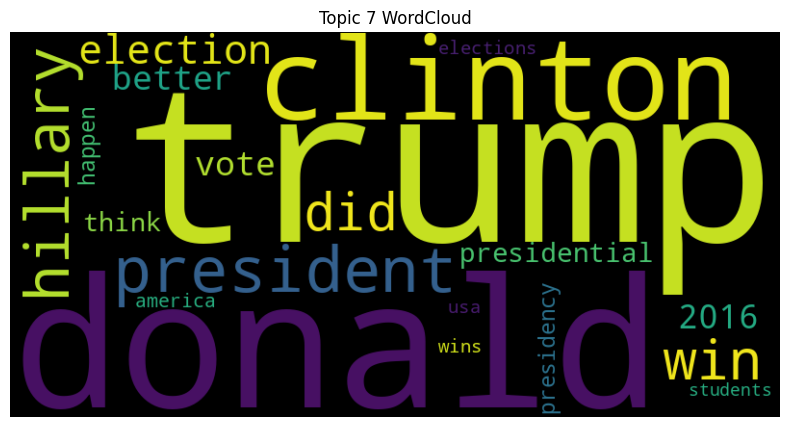

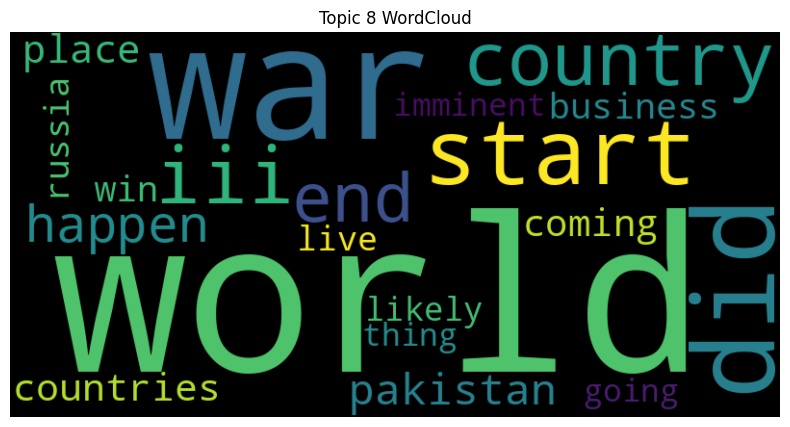

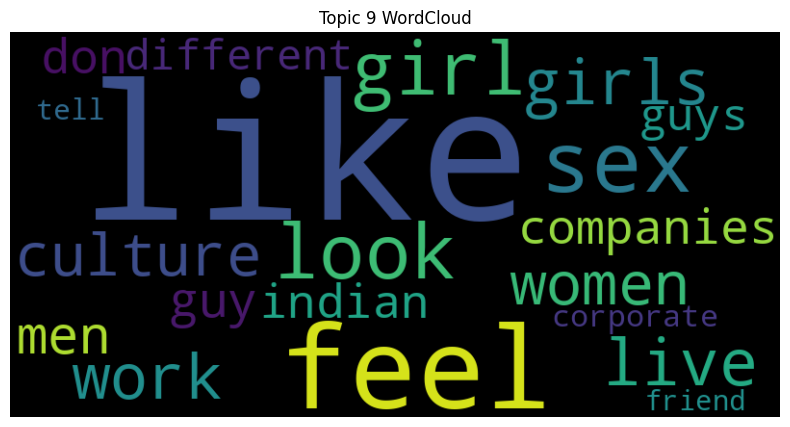

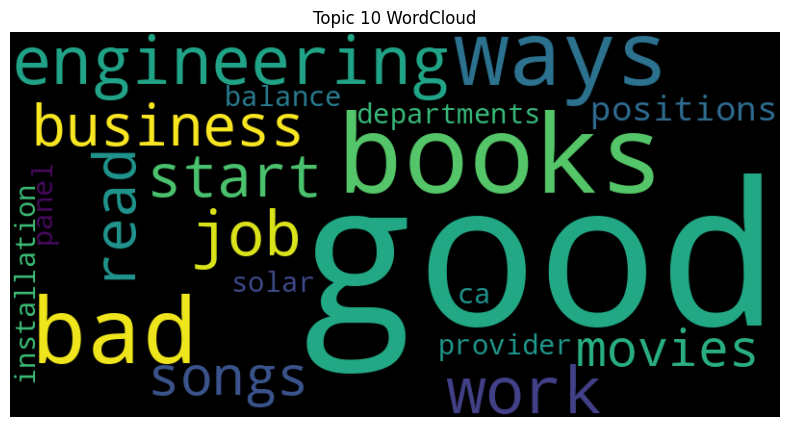

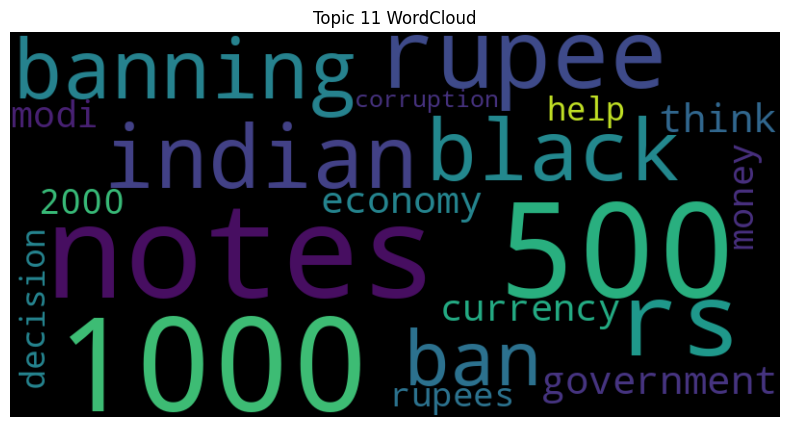

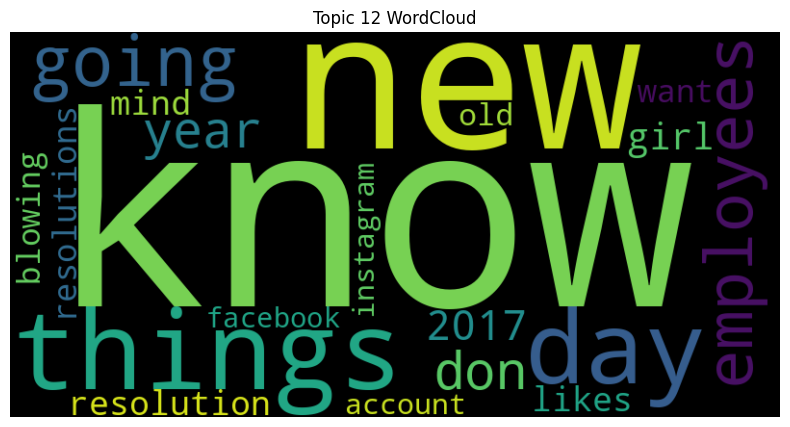

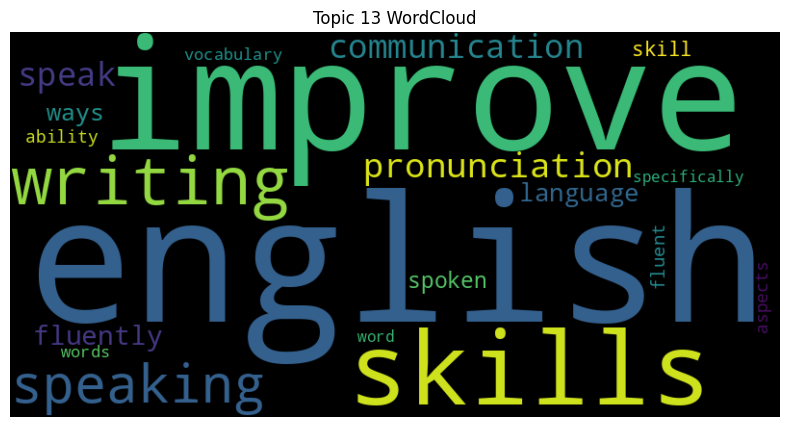

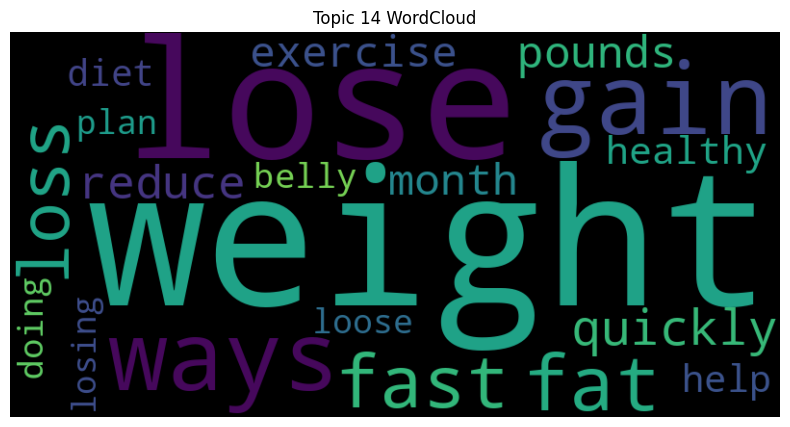

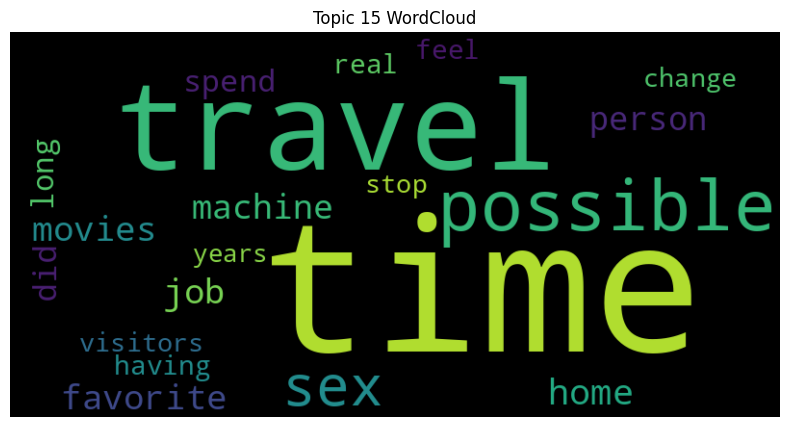

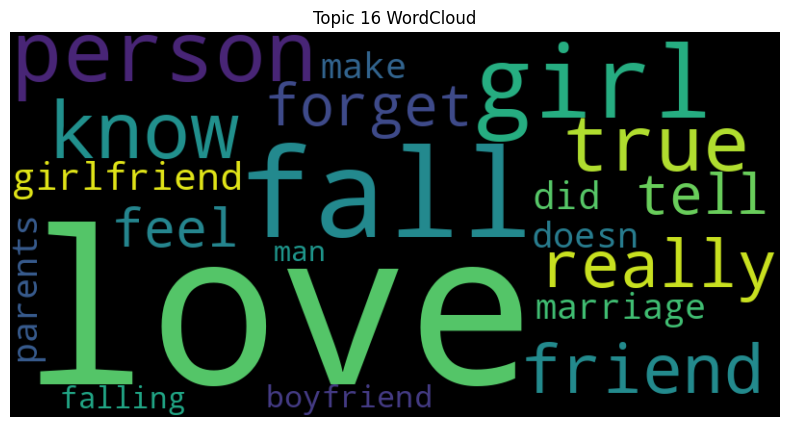

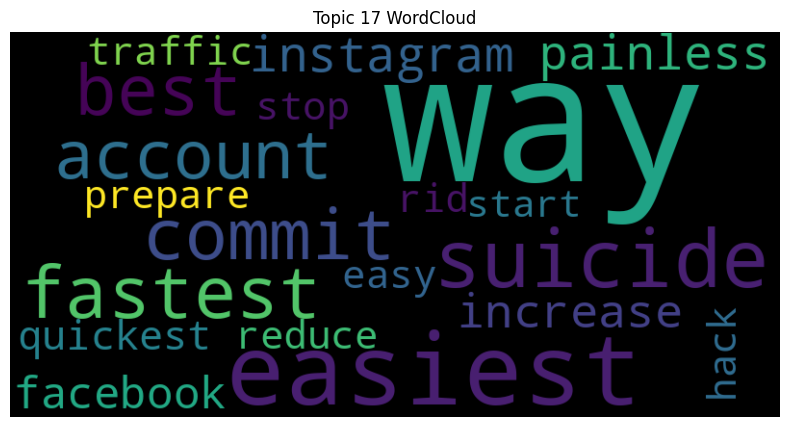

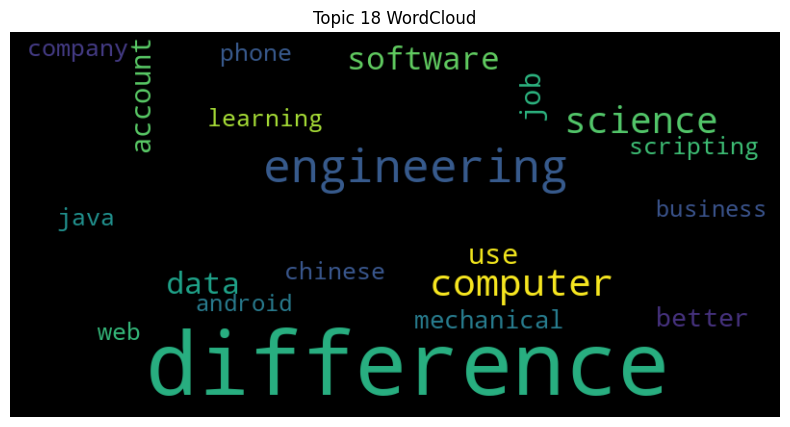

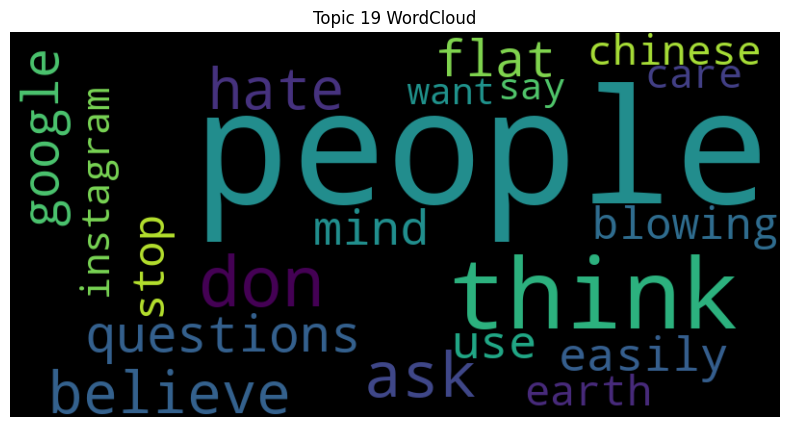

In [25]:
# Loop over each topic extracted by NMF
for index, topic in enumerate(nmf_model.components_):
    # Get top 20 words with highest importance for this topic
    top_words = [tfidf.get_feature_names_out()[i] for i in topic.argsort()[-20:]]
    
    # Get corresponding weights (importance scores) for these top words
    weights = topic[topic.argsort()[-20:]]
    
    # Create a dictionary mapping words to their weights
    word_freq = dict(zip(top_words, weights))
    
    # Generate a word cloud image from the word frequencies
    wc = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
    
    # Set up matplotlib figure size
    plt.figure(figsize=(10,5))
    
    # Set the title of the plot as the topic number
    plt.title(f"Topic {index} WordCloud")
    
    # Display the generated word cloud image
    plt.imshow(wc, interpolation="bilinear")
    
    # Remove axis for better visualization
    plt.axis("off")
    
    # Show the plot
    plt.show()


In [28]:
#Analyzing topic distributions across documents and aggregating document counts per topic

In [34]:
# Print the topic distribution scores for the first document (index 0)
print(np.round(topic_results[0], 3))

# Count how many documents are assigned to each topic (most dominant topic)
topic_counts = quora['Topic'].value_counts()

# Print the counts of documents per topic
print(topic_counts)


[0.    0.    0.    0.    0.    0.026 0.    0.    0.    0.    0.    0.001
 0.    0.    0.    0.    0.    0.001 0.    0.   ]
Topic
0     34826
19    29777
18    29290
1     28639
10    27684
9     23339
7     22916
17    22716
12    22162
15    21052
5     20091
2     17596
3     16149
8     15183
11    15031
4     14710
14    13285
16    12143
13     8967
6      8733
Name: count, dtype: int64


In [35]:
#Identifying top documents for each topic"

In [36]:
# Iterate through each topic index
for topic_num in range(nmf_model.n_components):
    # Get all document scores for the current topic
    topic_column = topic_results[:, topic_num]
    
    # Find the index of the document with the highest score for this topic
    top_doc_index = topic_column.argmax()
    
    # Print topic number and its representative document (question)
    print(f"Top document for topic {topic_num}:")
    print(quora['Question'].iloc[top_doc_index])
    print()


Top document for topic 0:
How can I become the best in everything I do?

Top document for topic 1:
What does Netlogon do?

Top document for topic 2:
Why are so many questions on Quora about Quora?

Top document for topic 3:
How do you make money online?

Top document for topic 4:
What's all about life?

Top document for topic 5:
Who is the nightingale of india?

Top document for topic 6:
Which one to learn, C++ or C#?

Top document for topic 7:
How would you describe Donald Trump?

Top document for topic 8:
What would the world be like after world war 3?

Top document for topic 9:
Which name you like most and why?

Top document for topic 10:
Denomzation is good?

Top document for topic 11:
Why there is a ban of 500 and 1000 notes?

Top document for topic 12:
What are some things new employees should know going into their first day at Trustmark?

Top document for topic 13:
What should I do to improve my English ?

Top document for topic 14:
How do i lose weight?

Top document for topic 